
<h2 id="实验要求">实验要求<a class="anchor-link" href="#实验要求">¶</a></h2><h3 id="截止日期：12月2日">截止日期：12月2日<a class="anchor-link" href="#截止日期：12月2日">¶</a></h3><p>作业的提交格式参考之前的说明，提交到2120220594@mail.nankai.edu.cn</p>
<h3 id="基本要求">基本要求<a class="anchor-link" href="#基本要求">¶</a></h3><p>a)  实现single-linkage层次聚类算法；
b)  实现complete-linkage层次聚类算法；</p>
<h3 id="中级要求">中级要求<a class="anchor-link" href="#中级要求">¶</a></h3><p>a) 实现average-linkage层次聚类算法；
b) 将上述三种算法的性能进行简要对比；</p>
<h3 id="高级要求">高级要求<a class="anchor-link" href="#高级要求">¶</a></h3><p>通过变换聚类簇的个数，测试上述三种算法的性能，并给出分析；</p>
<h3 id="数据集：数据自行生成">数据集：数据自行生成<a class="anchor-link" href="#数据集：数据自行生成">¶</a></h3><p>注：数据包含2000个样例，每个样例的前3列表示特征，第4列表示标签。</p>



<h2 id="基本概念">基本概念<a class="anchor-link" href="#基本概念">¶</a></h2><ul>
<li>定义：聚类就是对大量未知标注的数据集，按数据的内在相似性将数据集划分为多个类别，使类别内的数据相似度较大而类别间的数据相似度较⼩。</li>
<li>对象：观测数据或样本集合</li>
<li>核心概念：相似度 (Similarity) /距离 (Distance)</li>
<li>场景：<ul>
<li>图片检索：图片内容相似度</li>
<li>图片分割：图片像素（颜⾊）相似度</li>
<li>文件网页：文本内容相似度</li>
<li>社交网络：（被）关注⼈群，喜好，喜好内容</li>
<li>电商用户：点击 / 加购 / 购买商品</li>
</ul>
</li>
</ul>



<h2 id="相似性计算方法">相似性计算方法<a class="anchor-link" href="#相似性计算方法">¶</a></h2><ul>
<li>Pearson 相关系数: $\rho_{i j}=\frac{\sum_{k=1}^{m} \; \left(x_{k i}-\bar{x}_{i}\right)\left(x_{k j}-\bar{x}_{j}\right)}{\sqrt{\sum_{k=1}^{m} \; \left(x_{k i}-\bar{x}_{i}\right)^{2}}  \; \sqrt{\sum_{k=1}^{m} \; \left(x_{k j}-\bar{x}_{j}\right)^{2}}}$</li>
<li>余弦相似度 (Cosine similarity): $s_{i j}=\frac{\sum_{k=1}^{m} \; x_{k i} \;  x_{k j}}{\sqrt{\sum_{k=1}^{m} \; x_{k i}^{2}}  \; \sqrt{\sum_{k=1}^{m} \; x_{k j}^{2}}}$ </li>
</ul>
<p>越接近于 1，表示样本越相似；越接近于 0，表示样本越不相似。</p>
<p>用相似性度量时，相关系数越大 样本越相似。</p>



<h2 id="距离计算方法">距离计算方法<a class="anchor-link" href="#距离计算方法">¶</a></h2><p>样本集合为 $ X=\left[x_{i j}\right]_{m \times n}, x_{i}=\left(x_{1 i}, x_{2 i}, \ldots, x_{m i}\right)^{T}, x_{j}=\left(x_{1 j}, x_{2 j}, \ldots, x_{m j}\right)^{T} $</p>
<ul>
<li><p>闵可夫斯基距离 (Minkowski): $ d_{i j}=\left(\sum_{k=1}^{m}\left|x_{k i}-x_{k j}\right|^{p}\right)^{\frac{1}{p}} $</p>
<p>$ p=2 $, 欧式距离; $ p=1 $, 曼哈顿距离; $ p=\infty$ , 切比雪夫距离</p>
</li>
</ul>
<p>用距离度量时, 距离越小 样本越相似。</p>



<h2 id="距离与相关系数">距离与相关系数<a class="anchor-link" href="#距离与相关系数">¶</a></h2><p><img src="https://s2.loli.net/2022/10/23/BgN5kEv73LUWGXR.png" style="zoom: 55%;"/>
如果从距离的⻆度看，A 和 B 比 A 和 C 更相似；但是从相关系数的⻆度看，A 和 C 比 A 和 B 更相似。所以进行聚类时，选择合适的距离或相似度非常重要！</p>



<h2 id="类与类之间的距离">类与类之间的距离<a class="anchor-link" href="#类与类之间的距离">¶</a></h2><p>类 $ G_{p} $ 与类 $ G_{q}$  之间的距离 $ D(p, q) $, 也称为连接, 设类 $ G_{p} $ 包含 $ n_{p} $ 个样本, 类 $ G_{q} $ 包含 $ n_{q} $ 个样本, 类 $ G_{p} $ 与类 $ G_{q}$  之间的距离可以定义为多种不同的形式。</p>
<ul>
<li>最短距离 / 单连接 (single linkage):  $ G_{p} $ 的样本与 $ G_{q} $ 的样本之间的所有距离中的最短距离</li>
</ul>
$$ D_{p q}=\min \left\{d_{i j} \mid x_{i} \in G_{p}, x_{j} \in G_{q}\right\}$$<ul>
<li>最长距离 / 全连接 (complete linkage):  $ G_{p} $ 的样本与 $ G_{q} $ 样本之间的所有距离中的最长距离</li>
</ul>
$$D_{p q}=\max \left\{d_{i j} \mid x_{i} \in G_{p}, x_{j} \in G_{q}\right\}$$<ul>
<li>平均距离 (average linkage):  $ G_{p} $ 与 $ G_{q} $ 任意两个样本之间距离的平均值</li>
</ul>
$$D_{p q}=\frac{1}{n_{p} n_{q}} \sum_{x_{i} \in G_{p}} \sum_{x_{j} \in G_{q}} d_{i j}$$<p><img align="center" src="https://s2.loli.net/2022/11/18/9eyYQE7UkofLaCB.png" style="zoom:80%"/></p>



<h2 id="层次聚类">层次聚类<a class="anchor-link" href="#层次聚类">¶</a></h2><p>层次聚类假设类别之间存在层次结构，将样本聚到层次化的类中。</p>
<ul>
<li>聚合聚类 (bottom-up)</li>
</ul>
<p>采⽤自底向上的策略，开始将每个样本各自分到⼀个类；之后将相距最近的两类合并，建立⼀个新的类，重复操作直到满足停止条件；得到层次化的类别</p>
<ul>
<li>分裂聚类 (top-down): </li>
</ul>
<p>采⽤自顶向下的策略，开始将所有样本分到⼀个类；之后将已有类中相距最远的样本分到两个新的类，重复操作直到满足停止条件；得到层次化的类别</p>



<h2 id="聚合聚类">聚合聚类<a class="anchor-link" href="#聚合聚类">¶</a></h2><p>输⼊：n 个样本组成的样本集合及样本之间的距离；
输出：对样本集合的⼀个层次化聚类。</p>
<ol>
<li>计算 n 个样本两两之间的欧式距离 $\left\{d_{i j}\right\} $ ，记作矩阵 $ D=\left[d_{i j}\right]_{n \times n}$</li>
<li>构造 n 个类，每个类只包含⼀个样本</li>
<li>合并类间距离最小的两个类（类间距离：最短距离/最长距离/平均距离等），构建⼀个新类</li>
<li>计算新类与当前各类的距离。若类的个数为 1，终止计算，否则回到步骤3</li>
</ol>
<p>时间复杂度为 $ O\left(n^{3} m\right)$ ，m 是样本的维数，n 是样本个数</p>



<h2 id="例题">例题<a class="anchor-link" href="#例题">¶</a></h2><p><img align="left" src="https://s2.loli.net/2022/10/23/W9xVOvyzi4Egq3d.png" style="zoom:50%"/></p>


# 生成数据

<h3 id="数据集：数据自行生成">数据集：数据自行生成<a class="anchor-link" href="#数据集：数据自行生成">¶</a></h3><p>注：数据包含2000个样例，每个样例的前3列表示特征，第4列表示标签。</p>

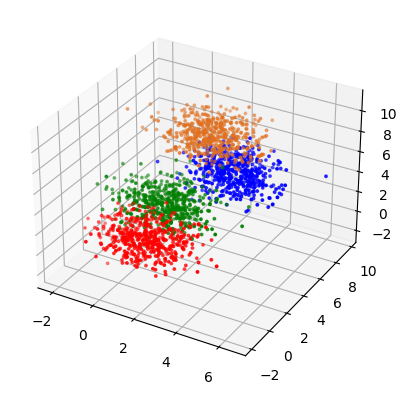

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
centers=[[1,1,1],[1,3,3],[3,6,5],[2,6,8]]# 用于产生聚类的中心点, 聚类中心的维度代表产生样本的维度

def create_data(center): 
    cov = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
    a1 = np.random.multivariate_normal(center[0], cov, 500) #满足均值矢量
    a2 = np.random.multivariate_normal(center[1], cov, 500)
    a3 = np.random.multivariate_normal(center[2], cov, 500)
    a4 = np.random.multivariate_normal(center[3], cov, 500)
    colors0 = 'r'
    colors1 = 'g' #点的颜色
    colors2 = 'b'
    colors3='#E07020'
    area = np.pi   # 点面积
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = a1[:, 0]
    y = a1[:, 1] 
    z = a1[:, 2]
    ax.scatter(x, y, z, c = colors0, s = area)
    x = a2[:, 0]
    y = a2[:, 1] 
    z = a2[:, 2]
    ax.scatter(x, y, z, c = colors1, s = area)
    x = a3[:, 0]
    y = a3[:, 1] 
    z = a3[:, 2]
    ax.scatter(x, y, z, c = colors2, s = area)
    x = a4[:, 0]
    y = a4[:, 1] 
    z = a4[:, 2]
    ax.scatter(x, y, z, c = colors3, s = area)
    ls = np.vstack((a1, a2,a3,a4))
    result = []
    for i in range(500):
        # ls.append(a1[i])
        result.append(1)
    for i in range(500):
        # ls.append(a2[i])
        result.append(2)
    for i in range(500):
        # ls.append(a3[i])
        result.append(3)
    for i in range(500):
        # ls.append(a4[i])
        result.append(4)
    plt.show()
    return ls, result
def create_data2(centers,num=100,std=0.7):
    '''
    生成用于聚类的数据集
    :param centers: 聚类的中心点组成的数组。如果中心点是二维的，则产生的每个样本都是二维的。
    :param num: 样本数
    :param std: 每个簇中样本的标准差
    :return: 用于聚类的数据集。是一个元组，第一个元素为样本集，第二个元素为样本集的真实簇分类标记
    '''
    X, labels_true = make_blobs(n_samples=num, centers=centers, cluster_std=std)
    return  X,labels_true
X,labels_true=create_data(centers)

<h3 id="基本要求">基本要求<a class="anchor-link" href="#基本要求">¶</a></h3><p>a)  实现single-linkage层次聚类算法；
b)  实现complete-linkage层次聚类算法；</p>
<h3 id="中级要求">中级要求<a class="anchor-link" href="#中级要求">¶</a></h3><p>a) 实现average-linkage层次聚类算法；
b) 将上述三种算法的性能进行简要对比；</p>

In [66]:

import numpy as np

MAX_NUM = 1e3

# method
# 最短距离
def singleLinkage(X,m,n):
    new_X=np.min(X,axis=0)
    return new_X
    
# 最长距离 
def completeLinkage(X,m,n):
    new_X=np.max(X,axis=0)
    return new_X
# 平均距离   平均   m:dest中的点数  n：src中的点数  
# 根据self.steps应该是能得到
def averageLinkage(X,m,n):
    new_X=[]
    for i in range(len(X[0])):
        new_X.append((X[0][i]*m+X[1][i]*n)/(m+n))
    return new_X
    
class AgglomerativeClustering:
    def __init__(self):
        # 对每次的合并进行记录
        self.steps=[]

    def fit(self,datas,method):
        self.dataCnt = datas.shape[0]
        # 预处理各点之间的距离   存的是欧氏距离
        allDist = np.zeros((self.dataCnt,self.dataCnt))
        for i in range(self.dataCnt):
            for j in range(i):
                allDist[i][j] = allDist[j][i] = np.sum((datas[i]-datas[j])**2)
        setList, clusterCount = [[i] for i in range(self.dataCnt)], self.dataCnt
        print("calculate distance finish!")

        # 聚类间距离矩阵
        clusterDist = np.zeros((self.dataCnt,self.dataCnt))+MAX_NUM
        for i in range(clusterCount):
            for j in range(i+1,clusterCount):
                clusterDist[i][j] = clusterDist[j][i] = allDist[i][j]
        print("calculate cluster distance finish!")

        while clusterCount != 1:
            # 最相似的两个聚类     返回的是下标     src看成是一个点
            res = np.argmin(clusterDist)
            dest,src = int(res/clusterCount),res%clusterCount
            # steps进行一次记录        steps append 源和目的类
            self.steps.append((setList[dest][0],setList[src][0]))
            # 聚类间距离矩阵更新     method返回的是新值   这块是加的，后面都加了两个长度
            modify = method(clusterDist[[dest,src]],len(setList[dest]),len(setList[src]))
            clusterDist[dest] = modify
            clusterDist[:,dest] = modify
            clusterDist = np.delete(clusterDist,src,axis=0)
            clusterDist = np.delete(clusterDist,src,axis=1)
            clusterDist[dest][dest] = MAX_NUM
            # 聚类更新
            setList[dest] = setList[dest] + setList[src]
            del setList[src]
            clusterCount -= 1
            if (self.dataCnt - clusterCount) % (self.dataCnt / 20) == 0:
                print(clusterCount, " clusters left.")

        print("cluster finish !")

    def label(self,k):
        root = list(range(self.dataCnt))
        def find_root(n):
            if root[root[n]] == root[n]:
                return root[n]
            root[n]=find_root(root[n])
            return root[n]
        for i in range(self.dataCnt-k): # 根据steps记录产生非连通图
            src,dest = self.steps[i]
            root[find_root(dest)] = find_root(src)
        cluster, clusterNum = [0 for i in range(self.dataCnt)], 0
        for i in range(self.dataCnt): # 将根节点标注为新的cluster
            if i == root[i]: # i是根
                clusterNum += 1
                cluster[i] = clusterNum
        for i in range(self.dataCnt): # 将非根节点标注为根节点的cluster
            if i != root[i]: # i不是根
                cluster[i] = cluster[find_root(i)]
        return cluster



generate data finish!
calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters left.
cluster finish !
-------Segmentation-------
calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters left.
cluster finish !
-------Segmen

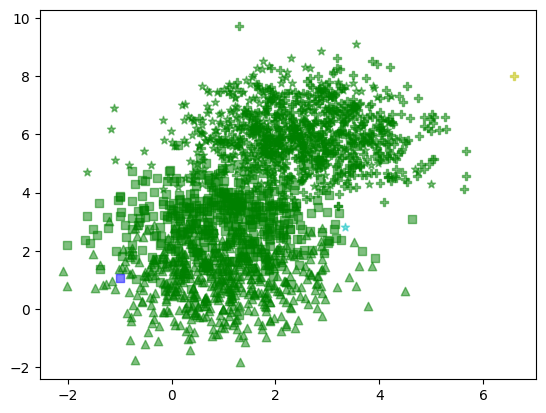

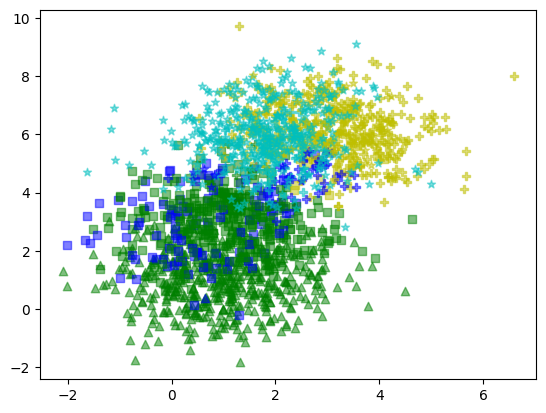

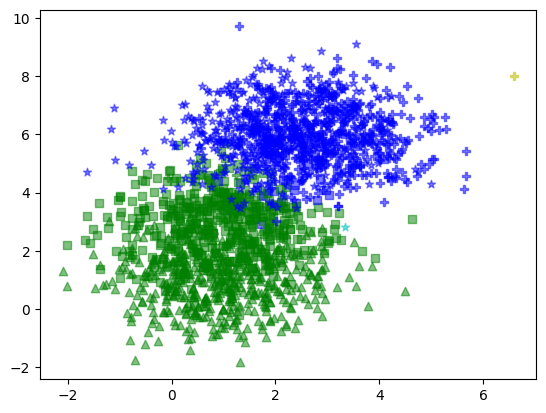

In [73]:
import time
def plot_data(*data):
    '''
    绘制用于聚类的数据集
    :param data: 可变参数。它是一个元组。元组元素依次为：第一个元素为样本集，第二个元素为样本集的真实簇分类标记，第三个元素为预测分类标记
    :return: None
    '''
    X,labels_true,labels_predict=data
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors='rgbyckm' # 每个簇的样本标记不同的颜色
    markers='o^sP*DX'
    for i in range(len(labels_true)):
        predict=labels_predict[i]
        ax.scatter(X[i,0],X[i,1],label="cluster %d"%labels_true[i],
        color=colors[predict%len(colors)],marker=markers[labels_true[i]%len(markers)],alpha=0.5)
print("generate data finish!")

METHOD_APPLY = [singleLinkage,completeLinkage,averageLinkage]
# METHOD_APPLY = [singleLinkage]
acc_rate=[]
times=[]

for method in METHOD_APPLY:
    t1=time.time()
    model = AgglomerativeClustering()
    model.fit(X,method)
    k=4
    plot_data(X,labels_true,model.label(k))
    t2=time.time()
    times.append(t2-t1)
    acc_num=dict()
    acc_num[1]=0
    acc_num[2]=0
    acc_num[3]=0
    acc_num[4]=0
    predict=model.label(k)

    for i in range(4):
        maxlabel = max(predict[i*500:(i+1)*500],key= predict[i*500:(i+1)*500].count)
        if acc_num[maxlabel]!=0:
            acc_num[maxlabel]=predict[i*500:(i+1)*500].count(maxlabel)
        else:
            acc_num[maxlabel]=max(acc_num[maxlabel],predict[i*500:(i+1)*500].count(maxlabel))
    acc_rate.append((acc_num[1]+acc_num[2]+acc_num[3]+acc_num[4])/2000)

    # print(model.label(k))
    print("-------Segmentation-------")
print("三个模型的正确率：",acc_rate)
print("三个模型所用时间：",times)


## 实验结果对比分析
理论上来说，signle-linkage和complete-linkage算法在处理边缘和交界处的数据时表现不够好：<br/>
- SingleLinkage容易造成两个聚类明明从“大局”上离得比较远，但是由于其中个别的点距离比较近就被合并了，并且这样合并之后这种情况会进一步扩大，最后会得到比较松散的聚类 。
- CompleteLinkage会导致两个 cluster 即使已经很接近了，但是只要有不配合的点存在，就不会合并。这两种相似度的定义方法的共同问题就是指考虑了某个有特点的数据，而没有考虑类内数据的整体特点。
- Average-linkage：这种方法就是把两个集合中的点两两的距离全部放在一起求一个平均值，相对也能得到合适一点的结果。考虑了整体情况，不会因为某些极端值或边界上的点影响整体结果。


但是从实验结果上来看，似乎complete-linkage的效果会更好一点，而且使用的时间更短，分析了一下数据，这应该是由数据特点构成的，首先几个类的中心点分布都比较均匀，另外标准差的设置也是3×3的单位矩阵，这样对于complete-linkage的特点而言，Average-linkage的优点并没有太好的表现出来，下面展示一下用助教给的代码生成数据的效果

calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters left.
cluster finish !
-------Segmentation-------
calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters left.
cluster finish !
-------Segmentation-------
calculat

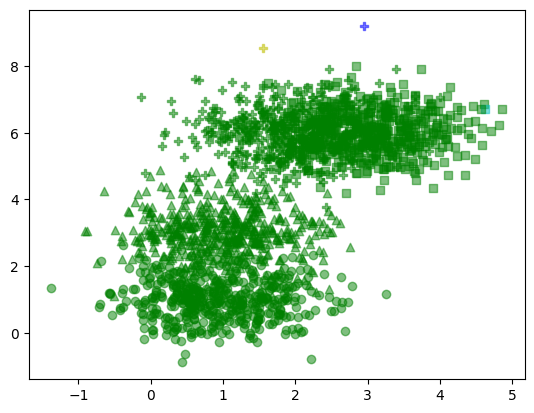

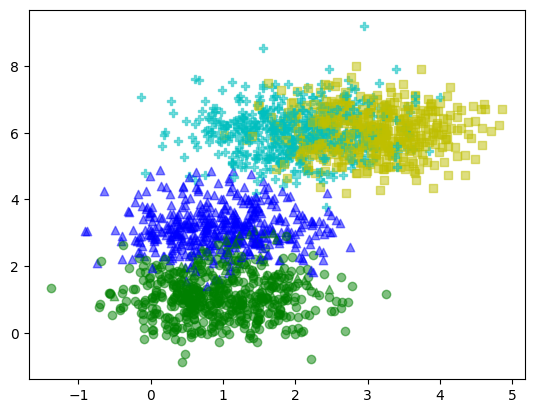

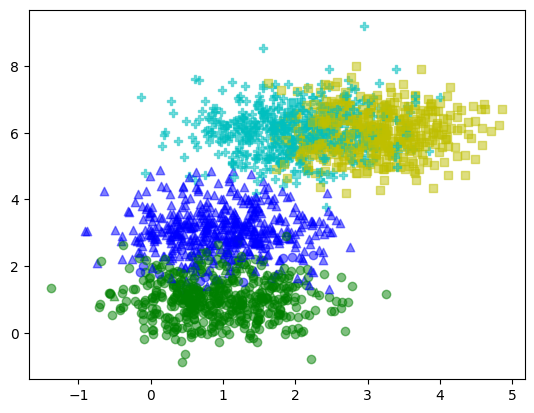

In [71]:
X,labels_true=create_data2(centers,num=2000)
METHOD_APPLY = [singleLinkage,completeLinkage,averageLinkage]
# METHOD_APPLY = [singleLinkage]
times=[]
for method in METHOD_APPLY:
    t1=time.time()
    model = AgglomerativeClustering()
    model.fit(X,method)
    k=4
    plot_data(X,labels_true,model.label(k))
    t2=time.time()
    times.append(t2-t1)
    predict=model.label(k)
    # print(model.label(k))
    print("-------Segmentation-------")

<h3 id="高级要求">高级要求<a class="anchor-link" href="#高级要求">¶</a></h3><p>通过变换聚类簇的个数，测试上述三种算法的性能，并给出分析；</p>

calculate distance finish!
calculate cluster distance finish!
1425  clusters left.
1350  clusters left.
1275  clusters left.
1200  clusters left.
1125  clusters left.
1050  clusters left.
975  clusters left.
900  clusters left.
825  clusters left.
750  clusters left.
675  clusters left.
600  clusters left.
525  clusters left.
450  clusters left.
375  clusters left.
300  clusters left.
225  clusters left.
150  clusters left.
75  clusters left.
cluster finish !
-------Segmentation-------
calculate distance finish!
calculate cluster distance finish!
1425  clusters left.
1350  clusters left.
1275  clusters left.
1200  clusters left.
1125  clusters left.
1050  clusters left.
975  clusters left.
900  clusters left.
825  clusters left.
750  clusters left.
675  clusters left.
600  clusters left.
525  clusters left.
450  clusters left.
375  clusters left.
300  clusters left.
225  clusters left.
150  clusters left.
75  clusters left.
cluster finish !
-------Segmentation-------
calculate distance

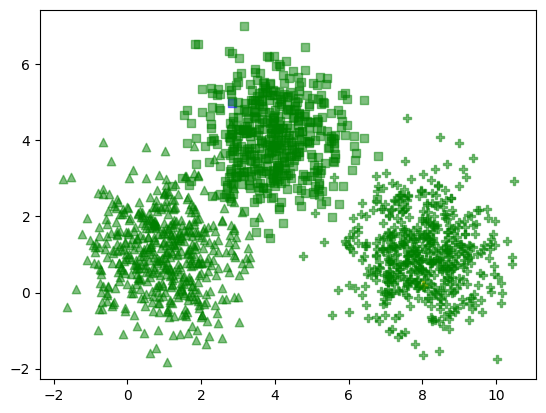

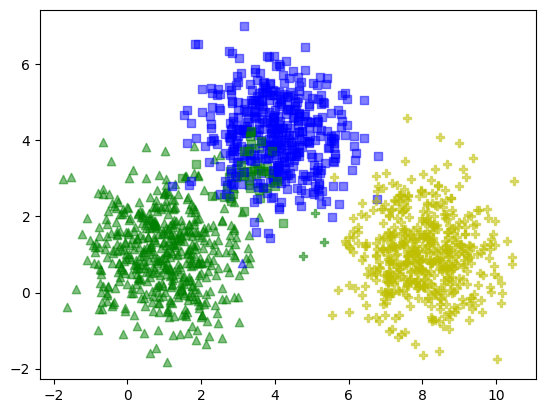

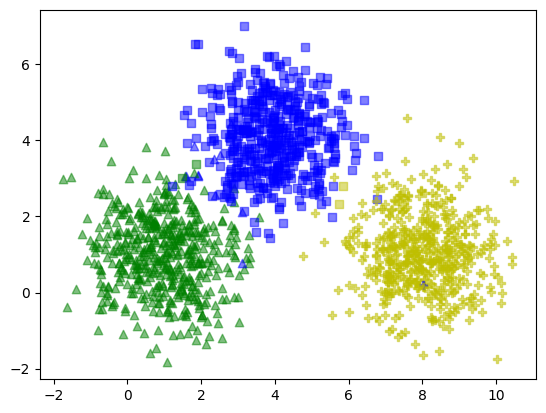

In [70]:
def create_data(center): 
    cov = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
    a1 = np.random.multivariate_normal((1, 1 ,1), cov, 500) #满足均值矢量
    a2 = np.random.multivariate_normal((4, 4 ,4), cov, 500)
    a3 = np.random.multivariate_normal((8, 1 ,1), cov, 500)
    ls = np.vstack((a1, a2,a3))
    result = []
    for i in range(500):
        # ls.append(a1[i])
        result.append(1)
    for i in range(500):
        # ls.append(a2[i])
        result.append(2)
    for i in range(500):
        # ls.append(a3[i])
        result.append(3)
    # plt.show()
    return ls, result

X2,labels_true2=create_data(centers)
METHOD_APPLY = [singleLinkage,completeLinkage,averageLinkage]
# METHOD_APPLY = [singleLinkage]
acc_rate=[]
times=[]
for method in METHOD_APPLY:
    t1=time.time()
    model = AgglomerativeClustering()
    model.fit(X2,method)
    k=3
    plot_data(X2,labels_true2,model.label(k))
    t2=time.time()
    times.append(t2-t1)
    acc_num=dict()
    acc_num[1]=0
    acc_num[2]=0
    acc_num[3]=0
    predict=model.label(k)

    for i in range(3):
        maxlabel = max(predict[i*500:(i+1)*500],key= predict[i*500:(i+1)*500].count)
        if acc_num[maxlabel]!=0:
            acc_num[maxlabel]=predict[i*500:(i+1)*500].count(maxlabel)
        else:
            acc_num[maxlabel]=max(acc_num[maxlabel],predict[i*500:(i+1)*500].count(maxlabel))
    acc_rate.append((acc_num[1]+acc_num[2]+acc_num[3])/1500)
    # print(model.label(k))
    print("-------Segmentation-------")
print("三个模型的正确率：",acc_rate)
print("三个模型所用时间：",times)

变换聚簇为三个，可以看到signle-linkage效果依旧不理想，主要是因为设置的中心点差距都不大，这样就有一些相近的点，就给signle-linkage模型带来了极大的不便利，会一直存在合并的情况，结果较差，但是这个数据中CompleteLinkage和Average-linkage表现差不多，准确率相差不大，主要是由于数据特性引起的，整体规律与4个聚类簇基本相同，相较而言，Average-linkage鲁棒性更好，signle-linkage和CompleteLinkage鲁棒性一般